In [1]:
install.packages("dplyr")
install.packages("caret")
install.packages("e1071")
install.packages("magrittr")
install.packages("pacman")
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("rio")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

als

In [2]:
train<-readRDS("/content/spambase_trn.rds")
test<-readRDS("/content/spambase_tst.rds")

In [3]:
head(train,5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,⋯,A49,A50,A51,A52,A53,A54,A55,A56,A57,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
1,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0,0.0,⋯,0.185,0.743,0,0.000,0.000,0.000,4.476,14,94,NotSpam
2,0.00,0.1,0.31,0.1,1.05,0.42,0.00,0.31,0,0.1,⋯,0.000,0.054,0,0.384,0.182,0.201,8.851,299,1726,Spam
3,0.00,0.0,0.00,0.0,0.00,1.21,0.00,0.00,0,0.0,⋯,0.000,0.212,0,0.000,0.000,0.000,1.406,5,45,NotSpam
4,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0,0.0,⋯,0.000,0.000,0,0.000,0.000,0.000,1.600,3,8,NotSpam
5,0.47,0.0,0.94,0.0,0.94,0.00,0.94,0.00,0,0.0,⋯,0.000,0.073,0,1.254,0.221,0.000,5.918,91,219,Spam


In [4]:
head(test,5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,⋯,A49,A50,A51,A52,A53,A54,A55,A56,A57,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
1,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,Spam
2,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,Spam
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,Spam
4,0.06,0.12,0.77,0,0.19,0.32,0.38,0.00,0.06,0.00,⋯,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,Spam
5,0.05,0.07,0.10,0,0.76,0.05,0.15,0.02,0.55,0.00,⋯,0.042,0.101,0.016,0.250,0.046,0.059,2.569,66,2259,Spam


In [6]:
library(caret)


Loading required package: ggplot2

Loading required package: lattice



In [7]:

# Define parameters for kNN
define_knn<-trainControl(method="repeatedcv",number=5,repeats=3)

In [8]:
# Set up parameters to try while training (3-19)
k = rep(seq(3, 20, by = 2), 2)

In [9]:
fit<-train(y~.,data=train,method="knn",trControl = define_knn,tuneGrid=data.frame(k=k),preProcess = c("center","scale"),
           na.action="na.omit")

In [11]:
library(magrittr)

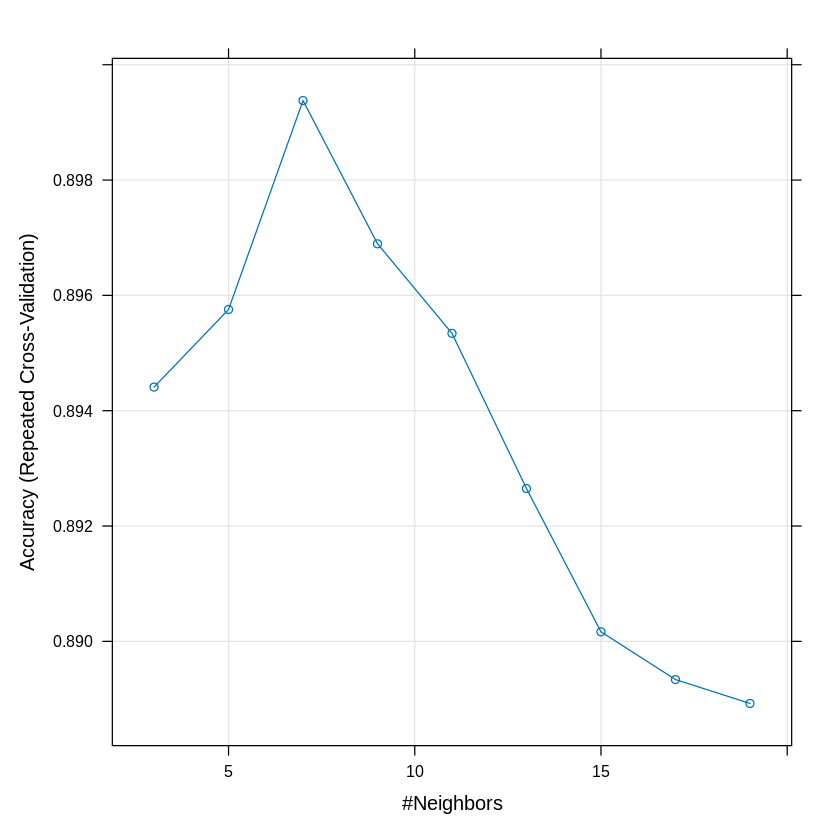

In [12]:
fit%>%plot()

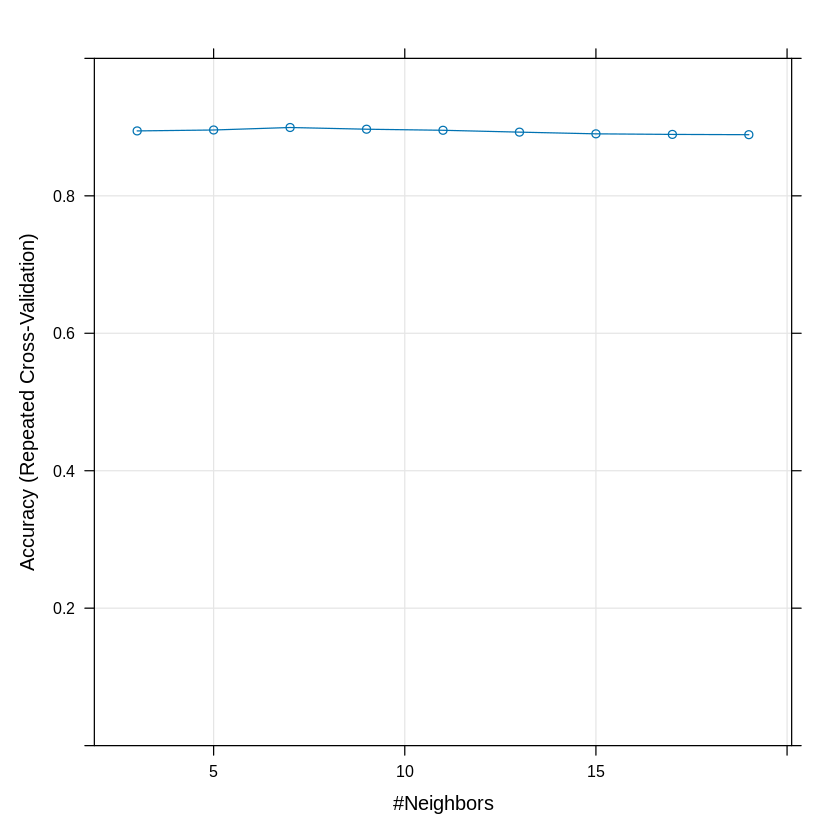

In [13]:
fit %>% plot(ylim = c(0, 1))  # Plot with 0-100% range

In [14]:
# Print the final model
fit %>% print()

k-Nearest Neighbors 

3220 samples
  57 predictor
   2 classes: 'NotSpam', 'Spam' 

Pre-processing: centered (57), scaled (57) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 2576, 2576, 2576, 2576, 2576, 2576, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   3  0.8944099  0.7758834
   5  0.8957557  0.7778996
   7  0.8993789  0.7851515
   9  0.8968944  0.7796627
  11  0.8953416  0.7758108
  13  0.8926501  0.7692998
  15  0.8901656  0.7638159
  17  0.8893375  0.7618319
  19  0.8889234  0.7608404

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 7.


In [16]:
pred<-predict(fit,newdata=test)
cm<-pred%>%confusionMatrix(reference = test$y)

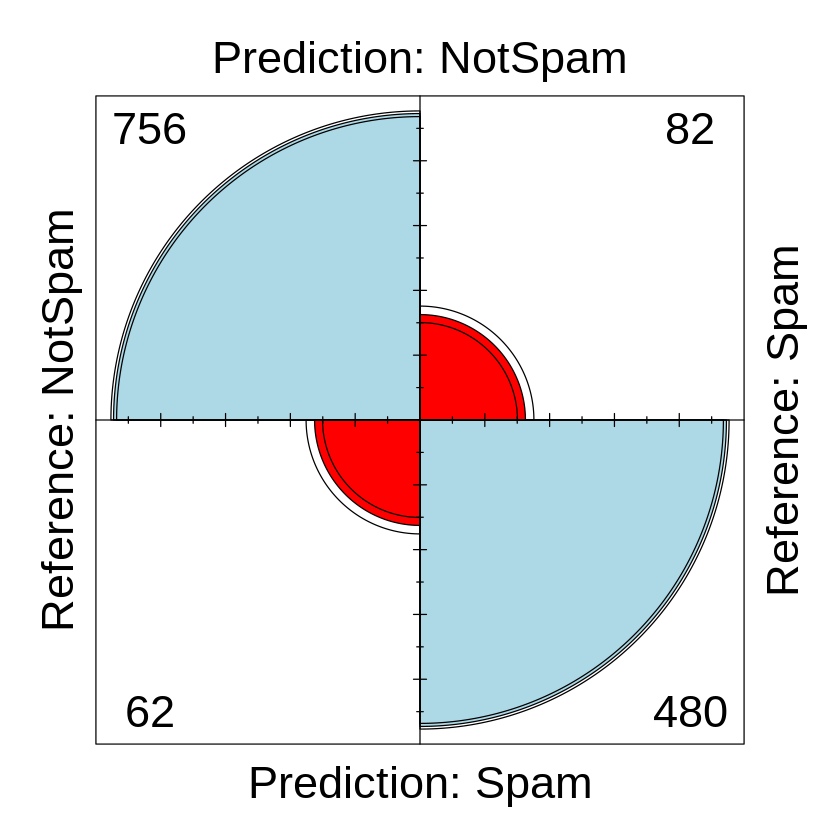

In [17]:
cm$table %>%fourfoldplot(color = c("red", "lightblue"))


In [18]:
# Print the confusion matrix
cm %>% print()

Confusion Matrix and Statistics

          Reference
Prediction NotSpam Spam
   NotSpam     756   82
   Spam         62  480
                                          
               Accuracy : 0.8957          
                 95% CI : (0.8783, 0.9113)
    No Information Rate : 0.5928          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7827          
                                          
 Mcnemar's Test P-Value : 0.1133          
                                          
            Sensitivity : 0.9242          
            Specificity : 0.8541          
         Pos Pred Value : 0.9021          
         Neg Pred Value : 0.8856          
             Prevalence : 0.5928          
         Detection Rate : 0.5478          
   Detection Prevalence : 0.6072          
      Balanced Accuracy : 0.8891          
                                          
       'Positive' Class : NotSpam         
               